In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv("C:/Users/thtang/Documents/GitHub/Fintech-Text-Mining-and-Machine-Learning/hw1/crawler_data.csv")
data.shape
data.drop("Date", axis=1, inplace=True)

In [22]:
print("ETF:",data.columns)

ETF: Index(['AGG', 'BND', 'BSV', 'BNDX', 'MINT', 'BIV', 'NEAR', 'SCHZ', 'FTSM',
       'SPAB', 'BLV', 'TOTL', 'IUSB', 'GVI', 'ISTB', 'BOND', 'IAGG', 'FBND',
       'VBND', 'AGGY', 'RAVI', 'ILTB', 'LDUR', 'FTSD', 'ULST', 'FLTB', 'XMPT',
       'FIBR', 'MINC', 'AGZD', 'NFLT', 'HOLD', 'FCOR', 'BYLD', 'KCNY', 'WYDE',
       'SAGG', 'AGND'],
      dtype='object')


In [4]:
data_shift_weekly = data.shift(periods=7, freq=None, axis=0)
weekly_return = ((data-data_shift_weekly)/data_shift_weekly).dropna()

data_shift_monthly = data.shift(periods=30, freq=None, axis=0)
monthly_return = ((data-data_shift_monthly)/data_shift_monthly).dropna()

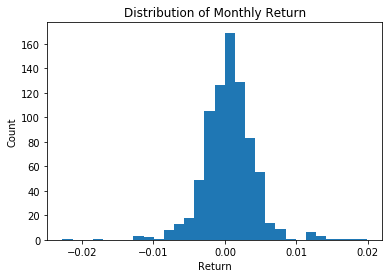

In [27]:
plt.hist(weekly_return["AGZD"], bins=30)
plt.title("Distribution of Monthly Return")
plt.ylabel("Count")
plt.xlabel("Return")
plt.show()

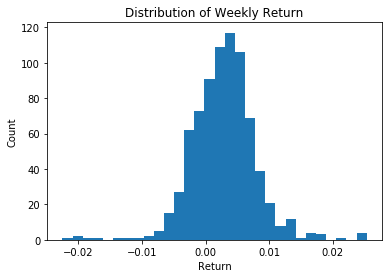

In [28]:
plt.hist(monthly_return["AGZD"], bins=30)
plt.title("Distribution of Weekly Return")
plt.ylabel("Count")
plt.xlabel("Return")
plt.show()

## 1. ASKSR

In [6]:
lamb = 1
rf = 0
def compute_ASKSR(u, sigma, S, K):
    # condition K>3+5/3*S**2
    alpha = 3*(3*K-4*S**2-9)**0.5/((sigma**2)*(3*K-5*S**2-9))
    beta = 3*S/(sigma*(3*K-5*S**2-9))
    eta = u-3*S*sigma/(3*K-4*S**2-9)
    delta = 3*sigma*(3*K-5*S**2-9)**0.5/(3*K-4*S**2-9)
    phi = (alpha**2-beta**2)**0.5
    a_star = 1/lamb*(beta+(alpha*(eta-rf))/((delta**2+(eta-rf)**2)**0.5))
    ASKSR = (2*(lamb*a_star*(eta-rf)-delta*(phi-(alpha**2-(beta-lamb*a_star))**0.5)))**0.5
    return ASKSR

In [7]:
u = weekly_return.mean()
sigma = weekly_return.std()
S = weekly_return.skew()
K = weekly_return.kurt()
# check whether the distribution following the condition for NIG distribution
print(K>3+5/3*S**2) 

AGG     False
BND     False
BSV     False
BNDX    False
MINT    False
BIV     False
NEAR    False
SCHZ    False
FTSM    False
SPAB    False
BLV     False
TOTL    False
IUSB    False
GVI     False
ISTB    False
BOND    False
IAGG    False
FBND    False
VBND    False
AGGY    False
RAVI     True
ILTB    False
LDUR     True
FTSD    False
ULST    False
FLTB    False
XMPT    False
FIBR    False
MINC    False
AGZD     True
NFLT    False
HOLD     True
FCOR     True
BYLD    False
KCNY    False
WYDE    False
SAGG    False
AGND    False
dtype: bool


In [8]:
print("ASKSR Result")
print(compute_ASKSR(u, sigma, S, K))

ASKSR Result
AGG           NaN
BND           NaN
BSV           NaN
BNDX          NaN
MINT          NaN
BIV           NaN
NEAR          NaN
SCHZ          NaN
FTSM          NaN
SPAB          NaN
BLV           NaN
TOTL          NaN
IUSB          NaN
GVI           NaN
ISTB          NaN
BOND          NaN
IAGG          NaN
FBND          NaN
VBND          NaN
AGGY          NaN
RAVI     7.731883
ILTB          NaN
LDUR    22.851686
FTSD          NaN
ULST          NaN
FLTB          NaN
XMPT          NaN
FIBR          NaN
MINC          NaN
AGZD     3.331421
NFLT          NaN
HOLD    15.317796
FCOR     3.119237
BYLD          NaN
KCNY          NaN
WYDE          NaN
SAGG          NaN
AGND          NaN
dtype: float64


In [10]:
u = monthly_return.mean()
sigma = monthly_return.std()
S = monthly_return.skew()
K = monthly_return.kurt()
# check whether the distribution following the condition for NIG distribution
print(K>3+5/3*S**2)
print("ASKSR Result")

AGG     False
BND     False
BSV     False
BNDX    False
MINT    False
BIV     False
NEAR    False
SCHZ    False
FTSM    False
SPAB    False
BLV     False
TOTL    False
IUSB    False
GVI     False
ISTB    False
BOND    False
IAGG    False
FBND    False
VBND    False
AGGY    False
RAVI    False
ILTB    False
LDUR    False
FTSD    False
ULST    False
FLTB    False
XMPT    False
FIBR    False
MINC    False
AGZD     True
NFLT    False
HOLD    False
FCOR    False
BYLD    False
KCNY    False
WYDE    False
SAGG    False
AGND    False
dtype: bool
ASKSR Result


In [11]:
print(compute_ASKSR(u, sigma, S, K))

AGG           NaN
BND           NaN
BSV           NaN
BNDX          NaN
MINT          NaN
BIV           NaN
NEAR          NaN
SCHZ          NaN
FTSM          NaN
SPAB          NaN
BLV           NaN
TOTL          NaN
IUSB          NaN
GVI           NaN
ISTB          NaN
BOND          NaN
IAGG          NaN
FBND          NaN
VBND          NaN
AGGY          NaN
RAVI          NaN
ILTB          NaN
LDUR          NaN
FTSD          NaN
ULST          NaN
FLTB          NaN
XMPT          NaN
FIBR          NaN
MINC          NaN
AGZD    11.629671
NFLT          NaN
HOLD          NaN
FCOR          NaN
BYLD          NaN
KCNY          NaN
WYDE          NaN
SAGG          NaN
AGND          NaN
dtype: float64


## 2. Omega ratio

$\Omega(r) = 1+\frac{u-r}{E[max(r-x,0)]}$

In [44]:
def compute_omega(x,u,r=0.01):
    ept =  np.average([max(r-i,0) for i in x])
    return 1+(u-r)/ept

In [46]:
u = weekly_return.mean()

In [62]:
omega_list = []
for etf in weekly_return.columns:
    omega_measure = compute_omega(weekly_return[etf], u[etf], r=0.01)
#     print("{}:{:.7f}".format(etf,omega_measure))
    omega_list.append(omega_measure)
print("ETF Ranking:{}".format(list(weekly_return.columns[np.argsort(omega_list)[::-1]])))

ETF Ranking:['BLV', 'ILTB', 'XMPT', 'KCNY', 'WYDE', 'AGND', 'FCOR', 'BIV', 'AGGY', 'NFLT', 'VBND', 'SAGG', 'IAGG', 'AGZD', 'FBND', 'BYLD', 'IUSB', 'BOND', 'BNDX', 'AGG', 'BND', 'SPAB', 'SCHZ', 'TOTL', 'FIBR', 'GVI', 'LDUR', 'MINT', 'BSV', 'FLTB', 'HOLD', 'RAVI', 'FTSM', 'MINC', 'NEAR', 'ULST', 'ISTB', 'FTSD']


In [63]:
omega_list = []
for etf in monthly_return.columns:
    omega_measure = compute_omega(monthly_return[etf], u[etf], r=0.01)
#     print("{}:{:.7f}".format(etf,omega_measure))
    omega_list.append(omega_measure)
print("ETF Ranking:{}".format(list(monthly_return.columns[np.argsort(omega_list)[::-1]])))

ETF Ranking:['WYDE', 'XMPT', 'BLV', 'ILTB', 'KCNY', 'SAGG', 'FIBR', 'VBND', 'BIV', 'AGND', 'FCOR', 'AGGY', 'AGG', 'SCHZ', 'SPAB', 'BND', 'GVI', 'FTSD', 'BSV', 'IUSB', 'BOND', 'FBND', 'FLTB', 'RAVI', 'HOLD', 'FTSM', 'NEAR', 'TOTL', 'BYLD', 'ULST', 'IAGG', 'ISTB', 'MINT', 'BNDX', 'MINC', 'NFLT', 'AGZD', 'LDUR']
